In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data
from keras.datasets import imdb
from keras.preprocessing import sequence
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length) 

Using TensorFlow backend.


In [3]:
X_train.shape

(25000, 500)

In [4]:
X_test.shape

(25000, 500)

In [5]:
# CascadeExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/imbd.json")  
gc = GCForest(config)

In [6]:
# count class
len(np.unique(y_train))

2

In [7]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees   
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
     

[ 2018-07-30 18:47:41,196][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 500)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 500)],y_test.shape=(25000,)
[ 2018-07-30 18:47:41,224][cascade_classifier.fit_transform] group_dims=[500]
[ 2018-07-30 18:47:41,225][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 18:47:41,226][cascade_classifier.fit_transform] group_ends=[500]
[ 2018-07-30 18:47:41,227][cascade_classifier.fit_transform] X_train.shape=(25000, 500),X_test.shape=(25000, 500)
[ 2018-07-30 18:47:41,292][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 500), X_cur_test.shape=(25000, 500)
[ 2018-07-30 18:47:45,150][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.04%
[ 2018-07-30 18:47:49,345][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.36%
[ 2018-07-30 18:47:53,642][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

In [8]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 18:48:24,343][cascade_classifier.transform] X_groups_test.shape=[(25000, 500)]
[ 2018-07-30 18:48:24,350][cascade_classifier.transform] group_dims=[500]
[ 2018-07-30 18:48:24,351][cascade_classifier.transform] X_test.shape=(25000, 500)
[ 2018-07-30 18:48:24,384][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 500)


Test Accuracy of CascadeExtraTrees = 52.656000 %
[[7193 5307]
 [6529 5971]]


             precision    recall  f1-score   support

          0       0.52      0.58      0.55     12500
          1       0.53      0.48      0.50     12500

avg / total       0.53      0.53      0.53     25000



In [9]:
# predict_proba result of CascadeExtraTrees + data

X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-30 18:48:28,172][cascade_classifier.transform] X_groups_test.shape=[(25000, 500)]
[ 2018-07-30 18:48:28,180][cascade_classifier.transform] group_dims=[500]
[ 2018-07-30 18:48:28,181][cascade_classifier.transform] X_test.shape=(25000, 500)
[ 2018-07-30 18:48:28,214][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 500)


In [10]:
X_test_enc.shape

(25000, 502)

In [11]:
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [12]:
X_train_new.shape

(25000, 502)

In [13]:
# Casacade ExtraTrees
config = load_json("./examples/imbdgc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-30 18:48:32,106][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 18:48:32,183][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 18:48:32,184][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 18:48:32,184][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 18:48:32,185][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 18:48:32,261][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 18:48:38,066][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.28%
[ 2018-07-30 18:48:44,236][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.32%
[ 2018-07-30 18:48:50,502][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 18:52:09,023][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=52.76%
[ 2018-07-30 18:52:13,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=51.28%
[ 2018-07-30 18:52:19,377][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=51.32%
[ 2018-07-30 18:52:26,624][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=51.12%
[ 2018-07-30 18:52:32,246][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=52.28%
[ 2018-07-30 18:52:36,424][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=53.96%
[ 2018-07-30 18:52:40,642][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=52.16%
[ 2018-07-30 18:52:44,673][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=52.64%


In [14]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-30 18:54:16,066][cascade_classifier.transform] X_groups_test.shape=[(25000, 502)]
[ 2018-07-30 18:54:16,106][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 18:54:16,107][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 18:54:16,147][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)
[ 2018-07-30 18:54:19,904][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(25000, 504)
[ 2018-07-30 18:54:23,658][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(25000, 504)
[ 2018-07-30 18:54:27,400][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(25000, 504)


Test Accuracy of CascadeExtraTrees = 52.924000 %
[[7302 5198]
 [6571 5929]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.53      0.47      0.50     12500

avg / total       0.53      0.53      0.53     25000



In [15]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/imbdgc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-30 18:54:31,679][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 18:54:31,763][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 18:54:31,763][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 18:54:31,764][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 18:54:31,765][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 18:54:31,844][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 18:54:37,748][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.16%
[ 2018-07-30 18:54:44,205][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.88%
[ 2018-07-30 18:54:50,638][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 18:58:11,092][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=51.12%
[ 2018-07-30 18:58:15,127][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=51.16%
[ 2018-07-30 18:58:19,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=52.08%
[ 2018-07-30 18:58:24,472][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=50.76%
[ 2018-07-30 18:58:30,108][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=50.76%
[ 2018-07-30 18:58:34,244][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=52.92%
[ 2018-07-30 18:58:38,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=51.92%
[ 2018-07-30 18:58:42,584][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=50.80%


[ 2018-07-30 19:01:42,176][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_7.predict)=50.64%
[ 2018-07-30 19:01:46,637][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_8.predict)=51.08%
[ 2018-07-30 19:01:52,324][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_9.predict)=52.36%
[ 2018-07-30 19:01:52,669][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_cv.predict)=51.68%
[ 2018-07-30 19:01:52,671][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.test.predict)=53.06%
[ 2018-07-30 19:01:52,673][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=51.68%
[ 2018-07-30 19:01:52,674][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=53.06%
[ 2018-07-30 19:01:52,675][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=52.57%, accuracy_test=53.2

('Test Accuracy of CascadeExtraTrees = 53.232000 %', 'Layer :', 0)
[[7193 5307]
 [6385 6115]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.54      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '441.503', ' seconds')


[ 2018-07-30 19:02:17,589][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:02:17,671][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:02:17,672][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:02:17,673][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:02:17,674][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:02:17,758][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:02:25,494][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.80%
[ 2018-07-30 19:02:32,973][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=54.44%
[ 2018-07-30 19:02:39,322][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:05:41,150][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 19:05:41,152][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 19:05:41,191][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


('Test Accuracy of CascadeExtraTrees = 52.824000 %', 'Layer :', 1)
[[7124 5376]
 [6418 6082]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '204.005', ' seconds')


[ 2018-07-30 19:05:45,915][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:05:45,995][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:05:45,996][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:05:45,996][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:05:45,997][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:05:46,077][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:05:52,131][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.12%
[ 2018-07-30 19:05:58,278][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.00%
[ 2018-07-30 19:06:06,222][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:09:20,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=51.32%
[ 2018-07-30 19:09:25,040][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=51.88%
[ 2018-07-30 19:09:29,229][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=52.88%
[ 2018-07-30 19:09:33,413][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=49.64%
[ 2018-07-30 19:09:37,635][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=51.56%
[ 2018-07-30 19:09:41,849][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=52.24%
[ 2018-07-30 19:09:46,043][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=52.36%
[ 2018-07-30 19:09:50,252][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=52.60%


('Test Accuracy of CascadeExtraTrees = 52.972000 %', 'Layer :', 2)
[[7049 5451]
 [6306 6194]]


             precision    recall  f1-score   support

          0       0.53      0.56      0.55     12500
          1       0.53      0.50      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '301.171', ' seconds')


[ 2018-07-30 19:10:58,767][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:10:58,847][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:10:58,848][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:10:58,849][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:10:58,849][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:10:58,929][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:11:03,434][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=51.32%
[ 2018-07-30 19:11:09,106][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.48%
[ 2018-07-30 19:11:13,280][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:14:13,678][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=51.76%
[ 2018-07-30 19:14:17,856][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=50.12%
[ 2018-07-30 19:14:22,249][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=53.00%
[ 2018-07-30 19:14:26,569][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=52.76%
[ 2018-07-30 19:14:30,870][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=51.76%
[ 2018-07-30 19:14:34,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=51.20%
[ 2018-07-30 19:14:39,176][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=52.92%
[ 2018-07-30 19:14:43,225][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=52.64%


('Test Accuracy of CascadeExtraTrees = 52.560000 %', 'Layer :', 3)
[[7045 5455]
 [6405 6095]]


             precision    recall  f1-score   support

          0       0.52      0.56      0.54     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.52     25000

(' Time ', '229.447', ' seconds')


[ 2018-07-30 19:14:55,791][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:14:55,868][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:14:55,869][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:14:55,870][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:14:55,871][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:14:55,949][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:15:01,864][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.92%
[ 2018-07-30 19:15:08,567][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.60%
[ 2018-07-30 19:15:15,816][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:18:19,701][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=50.96%
[ 2018-07-30 19:18:24,004][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=50.44%
[ 2018-07-30 19:18:28,289][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=51.96%
[ 2018-07-30 19:18:32,679][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=52.04%
[ 2018-07-30 19:18:36,857][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=51.76%
[ 2018-07-30 19:18:41,084][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=53.28%
[ 2018-07-30 19:18:45,288][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=52.44%
[ 2018-07-30 19:18:49,534][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=51.76%


('Test Accuracy of CascadeExtraTrees = 52.796000 %', 'Layer :', 4)
[[7012 5488]
 [6313 6187]]


             precision    recall  f1-score   support

          0       0.53      0.56      0.54     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '238.73', ' seconds')


[ 2018-07-30 19:19:02,103][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:19:02,183][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:19:02,184][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:19:02,185][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:19:02,186][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:19:02,265][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:19:08,695][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.88%
[ 2018-07-30 19:19:15,690][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.72%
[ 2018-07-30 19:19:22,153][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:22:17,092][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 19:22:17,093][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 19:22:17,133][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


('Test Accuracy of CascadeExtraTrees = 52.980000 %', 'Layer :', 5)
[[7144 5356]
 [6399 6101]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '195.233', ' seconds')


[ 2018-07-30 19:22:21,237][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:22:21,317][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:22:21,318][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:22:21,319][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:22:21,320][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:22:21,398][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:22:28,932][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.12%
[ 2018-07-30 19:22:35,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.64%
[ 2018-07-30 19:22:41,486][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:25:44,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=50.60%
[ 2018-07-30 19:25:48,942][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=52.00%
[ 2018-07-30 19:25:53,143][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=52.48%
[ 2018-07-30 19:25:57,317][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=51.84%
[ 2018-07-30 19:26:01,472][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=51.20%
[ 2018-07-30 19:26:05,877][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=51.12%
[ 2018-07-30 19:26:10,484][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=50.80%
[ 2018-07-30 19:26:15,239][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=50.80%


('Test Accuracy of CascadeExtraTrees = 53.004000 %', 'Layer :', 6)
[[7077 5423]
 [6326 6174]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '280.979', ' seconds')


[ 2018-07-30 19:27:13,679][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:27:13,758][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:27:13,759][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:27:13,760][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:27:13,761][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:27:13,841][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:27:19,880][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=54.04%
[ 2018-07-30 19:27:26,173][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.60%
[ 2018-07-30 19:27:32,361][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:30:27,070][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 19:30:27,071][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 19:30:27,111][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


('Test Accuracy of CascadeExtraTrees = 52.712000 %', 'Layer :', 7)
[[7120 5380]
 [6442 6058]]


             precision    recall  f1-score   support

          0       0.52      0.57      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '193.684', ' seconds')


[ 2018-07-30 19:30:31,198][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:30:31,277][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:30:31,278][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:30:31,279][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:30:31,280][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:30:31,359][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:30:37,383][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.44%
[ 2018-07-30 19:30:43,674][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.56%
[ 2018-07-30 19:30:49,830][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:33:44,282][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 19:33:44,283][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 19:33:44,323][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


('Test Accuracy of CascadeExtraTrees = 52.612000 %', 'Layer :', 8)
[[7018 5482]
 [6365 6135]]


             precision    recall  f1-score   support

          0       0.52      0.56      0.54     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '193.295', ' seconds')


[ 2018-07-30 19:33:48,413][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:33:48,492][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:33:48,493][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:33:48,494][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:33:48,495][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:33:48,575][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:33:54,385][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.04%
[ 2018-07-30 19:34:00,430][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=52.60%
[ 2018-07-30 19:34:06,696][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:37:09,598][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=50.00%
[ 2018-07-30 19:37:14,156][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=51.16%
[ 2018-07-30 19:37:18,813][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=53.96%
[ 2018-07-30 19:37:23,469][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=52.08%
[ 2018-07-30 19:37:29,482][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=51.28%
[ 2018-07-30 19:37:33,759][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=52.04%
[ 2018-07-30 19:37:37,944][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=53.28%
[ 2018-07-30 19:37:42,006][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=51.56%


('Test Accuracy of CascadeExtraTrees = 52.860000 %', 'Layer :', 9)
[[7193 5307]
 [6478 6022]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '324.359', ' seconds')


[ 2018-07-30 19:39:28,211][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:39:28,288][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:39:28,289][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:39:28,290][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:39:28,291][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:39:28,368][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:39:34,273][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.48%
[ 2018-07-30 19:39:40,513][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.76%
[ 2018-07-30 19:39:46,895][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:42:50,276][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=50.84%
[ 2018-07-30 19:42:54,352][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=51.76%
[ 2018-07-30 19:42:58,565][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=52.52%
[ 2018-07-30 19:43:02,745][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=52.44%
[ 2018-07-30 19:43:06,788][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=52.08%
[ 2018-07-30 19:43:11,248][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=52.40%
[ 2018-07-30 19:43:16,001][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=52.48%
[ 2018-07-30 19:43:20,278][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=53.32%


[ 2018-07-30 19:46:17,957][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_7.predict)=51.48%
[ 2018-07-30 19:46:22,535][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_8.predict)=51.16%
[ 2018-07-30 19:46:28,571][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_9.predict)=52.60%
[ 2018-07-30 19:46:28,920][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.train_cv.predict)=52.13%
[ 2018-07-30 19:46:28,921][kfold_wrapper.log_eval_metrics] Accuracy(layer_8 - estimator_0 - 10_folds.test.predict)=53.11%
[ 2018-07-30 19:46:28,924][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=52.13%
[ 2018-07-30 19:46:28,925][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=53.11%
[ 2018-07-30 19:46:29,018][cascade_classifier.fit_transform] [layer=9] look_indexs=[0], X_cur_train.shape=(25000, 504), X_cur_test.shape=(25000, 504)
[ 

('Test Accuracy of CascadeExtraTrees = 52.932000 %', 'Layer :', 10)
[[7226 5274]
 [6493 6007]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '469.605', ' seconds')


[ 2018-07-30 19:47:44,887][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:47:44,967][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:47:44,968][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:47:44,968][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:47:44,969][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:47:45,049][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:47:51,070][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.64%
[ 2018-07-30 19:47:57,252][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=50.72%
[ 2018-07-30 19:48:03,525][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:51:14,128][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=53.00%
[ 2018-07-30 19:51:18,211][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=51.04%
[ 2018-07-30 19:51:22,731][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=53.28%
[ 2018-07-30 19:51:28,489][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=50.40%
[ 2018-07-30 19:51:32,566][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=53.04%
[ 2018-07-30 19:51:36,758][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=54.04%
[ 2018-07-30 19:51:41,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=52.80%
[ 2018-07-30 19:51:45,585][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=52.12%


('Test Accuracy of CascadeExtraTrees = 52.936000 %', 'Layer :', 11)
[[6885 5615]
 [6151 6349]]


             precision    recall  f1-score   support

          0       0.53      0.55      0.54     12500
          1       0.53      0.51      0.52     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '247.359', ' seconds')


[ 2018-07-30 19:51:59,756][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:51:59,833][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:51:59,834][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:51:59,834][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:51:59,835][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:51:59,912][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:52:05,825][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.24%
[ 2018-07-30 19:52:14,116][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.28%
[ 2018-07-30 19:52:21,461][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:55:34,064][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=51.76%
[ 2018-07-30 19:55:38,270][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=50.32%
[ 2018-07-30 19:55:44,332][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=52.04%
[ 2018-07-30 19:55:48,768][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=50.84%
[ 2018-07-30 19:55:53,070][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=53.08%
[ 2018-07-30 19:55:57,288][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=51.48%
[ 2018-07-30 19:56:01,696][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=52.32%
[ 2018-07-30 19:56:07,245][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=51.28%


('Test Accuracy of CascadeExtraTrees = 52.796000 %', 'Layer :', 12)
[[7226 5274]
 [6527 5973]]


             precision    recall  f1-score   support

          0       0.53      0.58      0.55     12500
          1       0.53      0.48      0.50     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '252.758', ' seconds')


[ 2018-07-30 19:56:20,286][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 19:56:20,367][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 19:56:20,368][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 19:56:20,370][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 19:56:20,371][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 19:56:20,451][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 19:56:27,077][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.08%
[ 2018-07-30 19:56:34,258][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.24%
[ 2018-07-30 19:56:40,644][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 19:59:50,744][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=51.12%
[ 2018-07-30 19:59:54,837][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=52.24%
[ 2018-07-30 19:59:59,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=52.52%
[ 2018-07-30 20:00:03,586][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=51.44%
[ 2018-07-30 20:00:07,764][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=51.72%
[ 2018-07-30 20:00:12,033][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=52.72%
[ 2018-07-30 20:00:16,288][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=51.64%
[ 2018-07-30 20:00:21,874][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=51.00%


('Test Accuracy of CascadeExtraTrees = 52.792000 %', 'Layer :', 13)
[[7056 5444]
 [6358 6142]]


             precision    recall  f1-score   support

          0       0.53      0.56      0.54     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '295.836', ' seconds')


[ 2018-07-30 20:01:28,937][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 20:01:29,017][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 20:01:29,018][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 20:01:29,019][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 20:01:29,020][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 20:01:29,099][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 20:01:36,139][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.84%
[ 2018-07-30 20:01:43,127][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.48%
[ 2018-07-30 20:01:49,349][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 20:04:51,552][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 20:04:51,553][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 20:04:51,592][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


('Test Accuracy of CascadeExtraTrees = 52.860000 %', 'Layer :', 14)
[[7159 5341]
 [6444 6056]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '202.93', ' seconds')


[ 2018-07-30 20:04:55,576][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 20:04:55,655][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 20:04:55,656][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 20:04:55,657][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 20:04:55,658][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 20:04:55,738][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 20:05:01,768][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.60%
[ 2018-07-30 20:05:08,055][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=54.76%
[ 2018-07-30 20:05:14,498][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 20:08:33,783][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=51.88%
[ 2018-07-30 20:08:37,981][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=51.28%
[ 2018-07-30 20:08:42,173][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=53.00%
[ 2018-07-30 20:08:46,346][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=52.44%
[ 2018-07-30 20:08:50,533][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=52.60%
[ 2018-07-30 20:08:54,831][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=52.24%
[ 2018-07-30 20:08:58,966][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=52.08%
[ 2018-07-30 20:09:03,154][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=53.00%


('Test Accuracy of CascadeExtraTrees = 52.940000 %', 'Layer :', 15)
[[7118 5382]
 [6383 6117]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '252.525', ' seconds')


[ 2018-07-30 20:09:15,764][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 20:09:15,842][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 20:09:15,843][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 20:09:15,843][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 20:09:15,844][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 20:09:15,920][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 20:09:22,588][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.32%
[ 2018-07-30 20:09:28,761][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.28%
[ 2018-07-30 20:09:35,212][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 20:12:42,247][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 20:12:42,249][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 20:12:42,294][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


('Test Accuracy of CascadeExtraTrees = 52.936000 %', 'Layer :', 16)
[[7130 5370]
 [6396 6104]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '206.737', ' seconds')


[ 2018-07-30 20:12:47,057][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 20:12:47,134][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 20:12:47,135][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 20:12:47,136][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 20:12:47,137][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 20:12:47,214][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 20:12:52,231][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=52.96%
[ 2018-07-30 20:12:57,906][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.76%
[ 2018-07-30 20:13:03,234][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 20:15:47,859][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 20:15:47,860][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 20:15:47,899][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


('Test Accuracy of CascadeExtraTrees = 53.092000 %', 'Layer :', 17)
[[7170 5330]
 [6397 6103]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.49      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '181.014', ' seconds')


[ 2018-07-30 20:15:51,978][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 20:15:52,054][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 20:15:52,055][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 20:15:52,056][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 20:15:52,056][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 20:15:52,136][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 20:15:55,971][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=54.12%
[ 2018-07-30 20:16:00,109][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=53.24%
[ 2018-07-30 20:16:04,292][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 20:18:44,611][cascade_classifier.transform] group_dims=[502]
[ 2018-07-30 20:18:44,612][cascade_classifier.transform] X_test.shape=(25000, 502)
[ 2018-07-30 20:18:44,650][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(25000, 502)


('Test Accuracy of CascadeExtraTrees = 52.800000 %', 'Layer :', 18)
[[7139 5361]
 [6439 6061]]


             precision    recall  f1-score   support

          0       0.53      0.57      0.55     12500
          1       0.53      0.48      0.51     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '172.837', ' seconds')


[ 2018-07-30 20:18:48,657][cascade_classifier.fit_transform] X_groups_train.shape=[(25000, 502)],y_train.shape=(25000,),X_groups_test.shape=[(25000, 502)],y_test.shape=(25000,)
[ 2018-07-30 20:18:48,733][cascade_classifier.fit_transform] group_dims=[502]
[ 2018-07-30 20:18:48,734][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-30 20:18:48,735][cascade_classifier.fit_transform] group_ends=[502]
[ 2018-07-30 20:18:48,736][cascade_classifier.fit_transform] X_train.shape=(25000, 502),X_test.shape=(25000, 502)
[ 2018-07-30 20:18:48,812][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(25000, 502), X_cur_test.shape=(25000, 502)
[ 2018-07-30 20:18:52,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=53.36%
[ 2018-07-30 20:18:56,824][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=51.32%
[ 2018-07-30 20:19:01,001][kfold_wrapper.log_eval_metrics] Accuracy(layer_0

[ 2018-07-30 20:21:49,653][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=53.24%
[ 2018-07-30 20:21:53,759][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=49.76%
[ 2018-07-30 20:21:57,823][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=52.72%
[ 2018-07-30 20:22:02,036][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=52.60%
[ 2018-07-30 20:22:06,054][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=53.56%
[ 2018-07-30 20:22:10,206][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=53.40%
[ 2018-07-30 20:22:14,519][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=53.72%
[ 2018-07-30 20:22:19,050][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=51.44%


('Test Accuracy of CascadeExtraTrees = 52.720000 %', 'Layer :', 19)
[[7239 5261]
 [6559 5941]]


             precision    recall  f1-score   support

          0       0.52      0.58      0.55     12500
          1       0.53      0.48      0.50     12500

avg / total       0.53      0.53      0.53     25000

(' Time ', '304.12', ' seconds')


('Opt_Cascade_num =', 0, ' Accuracy =', 53.23, 'Time =', 441.5)


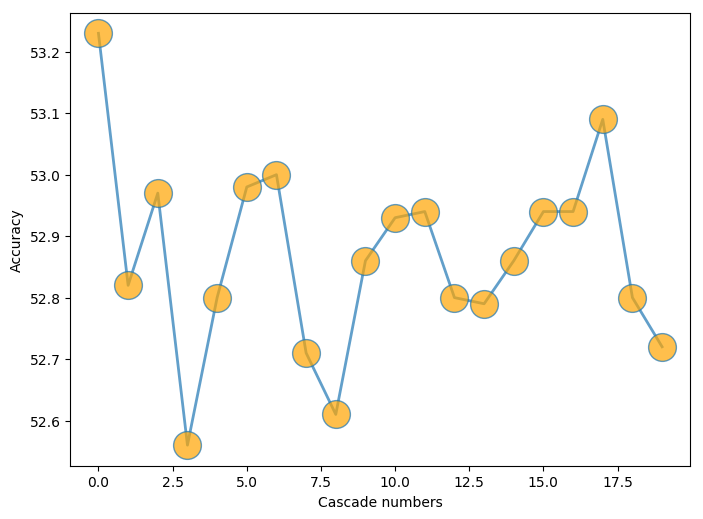

In [16]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [17]:
Accuracy

[53.23,
 52.82,
 52.97,
 52.56,
 52.8,
 52.98,
 53.0,
 52.71,
 52.61,
 52.86,
 52.93,
 52.94,
 52.8,
 52.79,
 52.86,
 52.94,
 52.94,
 53.09,
 52.8,
 52.72]